# Homework 2 Problem 3


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

In [90]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


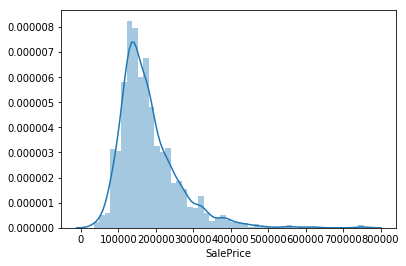

In [91]:
sns.distplot(train['SalePrice'])

### Transformation on the respones variable SalePrice
Let's check the distribution of the response variable SalePrice
It seems not very normal distributed, what can we do about it??
Please apply the log transformation on the price and plot the distribution of the sale price, is it more normal?

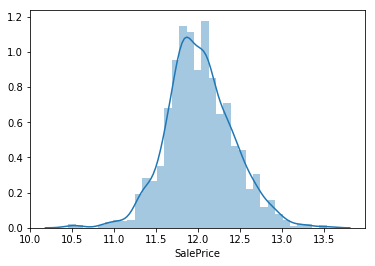

In [92]:
# Fill in your code for transformation
sns.distplot(train['SalePrice'].apply(np.log))

Yes, the distribution is more normal

### Preprocessing: Deal with the missing data (NA) and create dummy variable for categorical variables

Please use the mean of the training data to fit in the NA in both training and testing data set. Please also create dummy variables for all the text dataset.

In [93]:
test['SalePrice'] = 'NA'
data = pd.concat([train,test],axis= 0, join = "outer")
df = data.drop(['SalePrice'],axis = 1)
df.fillna((data.mean()),inplace = True)
df['SalePrice'] = data['SalePrice']
col = train[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]
data_1 = pd.get_dummies(df, columns=col)

df1 = data_1[data_1['SalePrice'] != 'NA']
df2 = data_1[data_1['SalePrice'] == 'NA']

X_train = df1.drop(['SalePrice'],axis = 1)
Y_train = df1['SalePrice']
X_test = df2.drop(['SalePrice'],axis = 1)

print(X_train.shape, Y_train.shape, X_test.shape)
print(Y_train.head())

(1460, 289) (1460,) (1459, 289)
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: object


### Model 1: Use Ridge regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


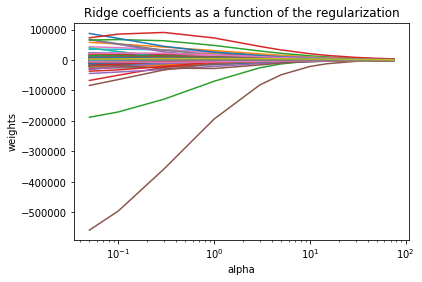

In [94]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')


plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [95]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error',store_cv_values = True,normalize=True)
ridgecv.fit(X_train, Y_train)
print("Best Tuning parameter for Ridge: ",ridgecv.alpha_)
ridgecv.cv_values_

Best Tuning parameter for Ridge:  0.3


array([[ 26883.33774161,  27190.90808918,  28011.036601  , ...,
         17834.13301422,  12952.15835784,   9617.98651754],
       [ 26847.10513751,  24511.86521955,  17818.69555966, ...,
          -577.67884234,   -441.46921054,   -333.28930621],
       [ 26006.63784185,  28271.26641216,  33353.89657979, ...,
         22311.86862147,  16060.05147318,  11866.40206707],
       ..., 
       [ 92598.84491057,  89668.2146568 ,  83979.86491072, ...,
         14500.02684586,   9550.43661537,   6700.43499408],
       [-37191.82633801, -36605.61217078, -35767.30242426, ...,
        -17057.9475553 , -12113.49287976,  -8880.71315006],
       [-29416.07352032, -28827.62354993, -27376.95685773, ...,
         -9131.27122143,  -6349.41164116,  -4599.143844  ]])

In [96]:
ridge2 = Ridge(alpha=ridgecv.alpha_,normalize=True)
ridge2.fit(X_train, Y_train)
y_pred = ridge2.predict(X_test)
print("Prediction of the SalePrice :",y_pred)

Prediction of the SalePrice : [ 112860.9332435   156638.03207483  184150.41119239 ...,  171899.91634674
  111089.10035813  220256.90211334]


In [97]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

val_errors = []
for alpha in alphas:
    print(alpha)
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=77,normalize=True)
    errors=cross_val_score(ridge,X_train,Y_train,scoring='neg_mean_squared_error',cv=10, n_jobs=-1)
    cross_scores_corrected = -1 * errors  # Scikit learn returns negative vals && we need root
    val_errors.append(np.mean(cross_scores_corrected))

print("Cross-Validation error :",val_errors)

0.05
0.1
0.3
1
3
5
10
15
30
50
75
Cross-Validation error : [1172612259.1369553, 1129803144.8190551, 1059971723.5892397, 1050929833.1977243, 1274352942.4947391, 1531785771.7055275, 2111651213.5214372, 2582502600.4419732, 3541438900.0116768, 4258723205.6718345, 4763987652.3259335]


Text(0.5,1,'Alpha V/S Cross-validation error for Ridge')

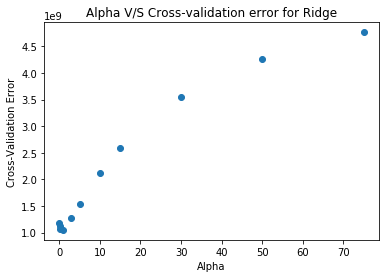

In [98]:
plt.scatter(alphas,val_errors)
plt.ylabel('Cross-Validation Error')
plt.xlabel('Alpha')
plt.title('Alpha V/S Cross-validation error for Ridge')


### Model 2: Use Lasso regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


0.05


C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.1


C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.3
1
3
5
10
15
30
50
75


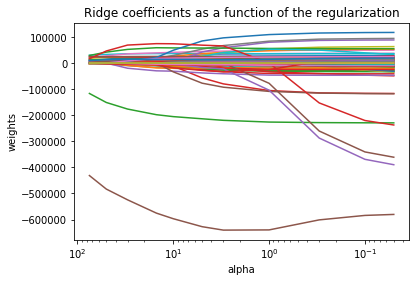

In [99]:


lasso = Lasso(normalize=True,max_iter=10000)
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cross_val_errors = []
coef = []
for a in alphas:
    print(a)
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train.as_matrix())
    coef.append(lasso.coef_)
    errors=cross_val_score(lasso,X_train,Y_train,scoring='neg_mean_squared_error',cv=10, n_jobs=-1)
    cross_scores_corrected = -1 * errors  # Scikit learn returns negative vals && we need root
    cross_val_errors.append(np.mean(cross_scores_corrected))
        
ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

Cross-validation error : [2174862986.0223818, 2059898318.9469199, 1682356315.221272, 1226229313.0275884, 1191078910.93086, 1170488974.3556423, 1131502400.9435945, 1108552495.1945729, 1067358298.1427078, 1055675989.7051748, 1094228968.286268]


Text(0.5,1,'Alpha V/S Cross-validation error for Lasso')

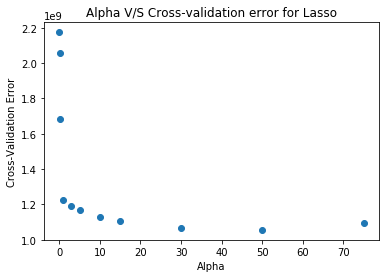

In [100]:
print("Cross-validation error :",cross_val_errors)
plt.scatter(alphas,cross_val_errors)
plt.ylabel('Cross-Validation Error')
plt.xlabel('Alpha')
plt.title('Alpha V/S Cross-validation error for Lasso')

In [101]:
lassocv = LassoCV(n_alphas = 11, alphas = alphas, normalize=True,max_iter = 100000)
lassocv.fit(X_train, Y_train)
print('Best Alpha:',lassocv.alpha_)

Best Alpha: 30.0


In [102]:
lasso.set_params(alpha=lassocv.alpha_,normalize=True)
lasso.fit(X_train, Y_train)
y_pred = lasso.predict(X_test)
print("Prediction of the SalePrice using Lasso :",y_pred)

Prediction of the SalePrice using Lasso : [ 115949.19860536  161530.51238817  179234.19666084 ...,  166437.92375512
  117132.10515915  224170.69941889]
